In [11]:
import cv2 as cv
import numpy as np
from chess_homography import *
from ultralytics import YOLO

In [12]:
# # Start by getting the params from my_cam_matrix.npz
# npz_calib = np.load('pics/my_cam_matrix.npz')

# print(npz_calib)

# # Get the camera matrix and distortion coefficients
# camera_matrix = npz_calib['mtx']
# dist_coeffs = npz_calib['dist']

# # Get all jpg files in pics/
# import os
# pics = [f for f in os.listdir('pics/') if f.endswith('.jpg') and f.startswith('2024')]

# # Loop through all the pics
# for pic in pics:
#     # Read the image
#     img = cv.imread('pics/' + pic)
#     # Get the shape of the image
#     h, w = img.shape[:2]
#     # Get the new camera matrix
#     # new_camera_matrix, roi = cv.getOptimalNewCameraMatrix(camera_matrix, dist_coeffs, (w, h), 1, (w, h))
#     # Undistort the image
#     undistorted_img = cv.undistort(img, camera_matrix, dist_coeffs)#, None, new_camera_matrix)
#     # Save the undistorted image
#     # cv.imwrite('pics/undistorted_' + pic, undistorted_img)
#     # Show the undistorted image
#     cv.imshow('Undistorted Image', undistorted_img)
#     if cv.waitKey(0) & 0xFF == ord('q'):
#         break
    
# cv.destroyAllWindows()

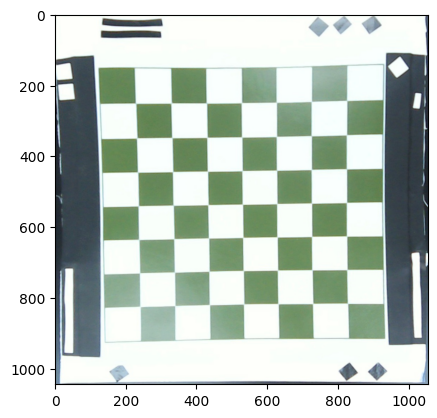

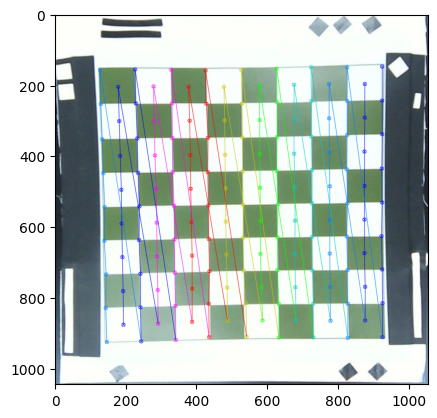

In [13]:
query = cv.imread('query.jpg', cv.IMREAD_COLOR)
assert not isinstance(query, type(None))
plt.imshow(query)
plt.show()
centers, corners = get_centers(query, plot=True, return_corners=True)

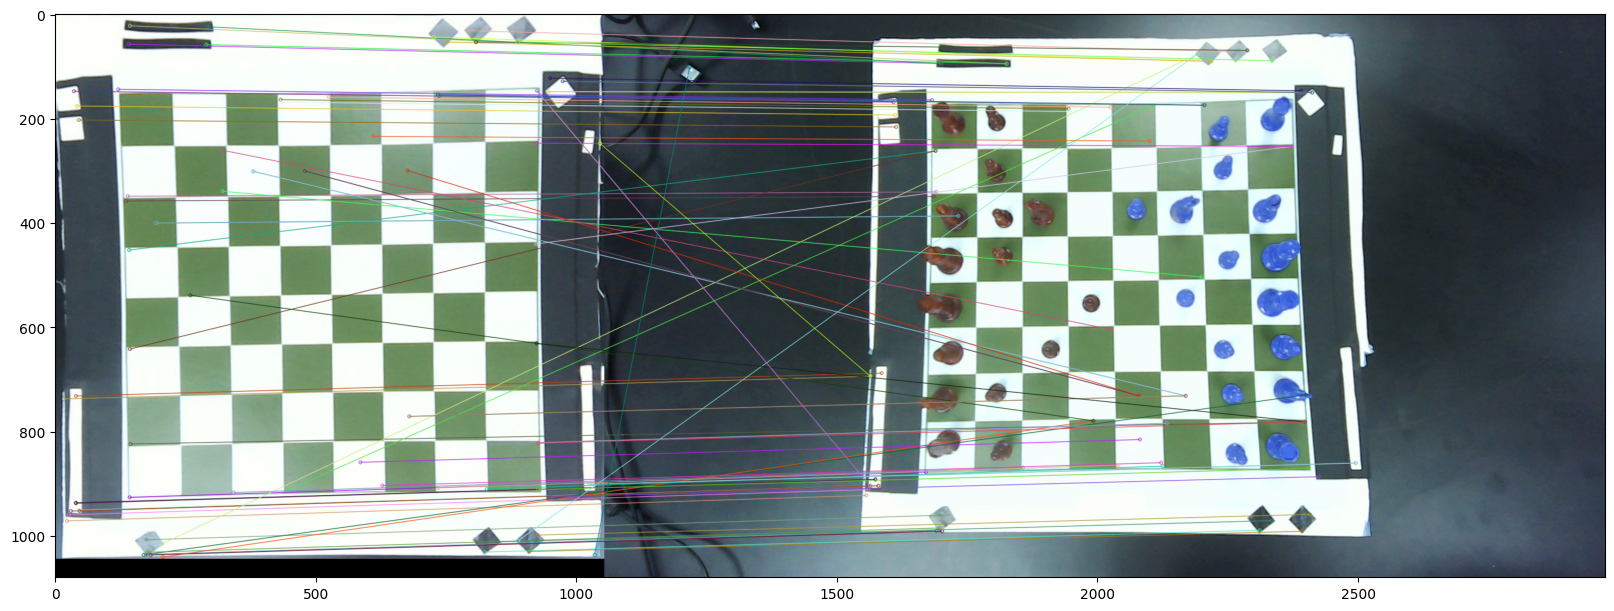

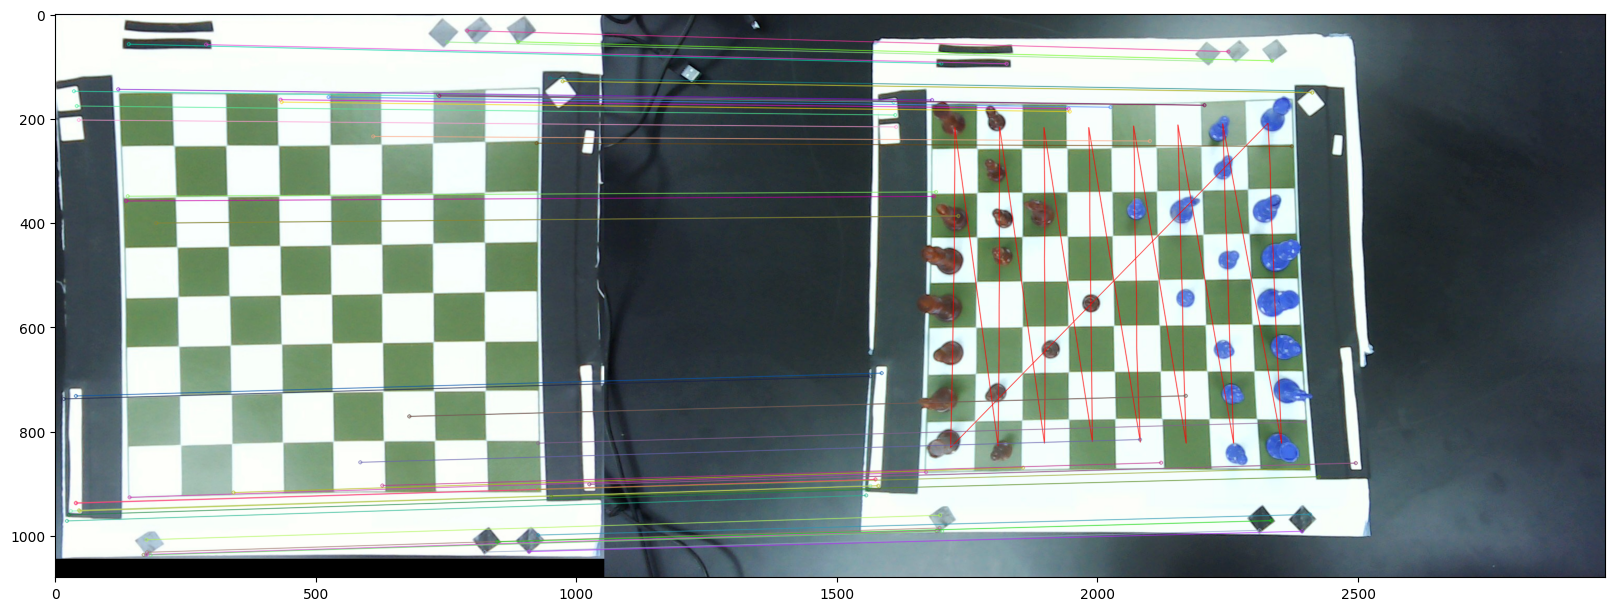

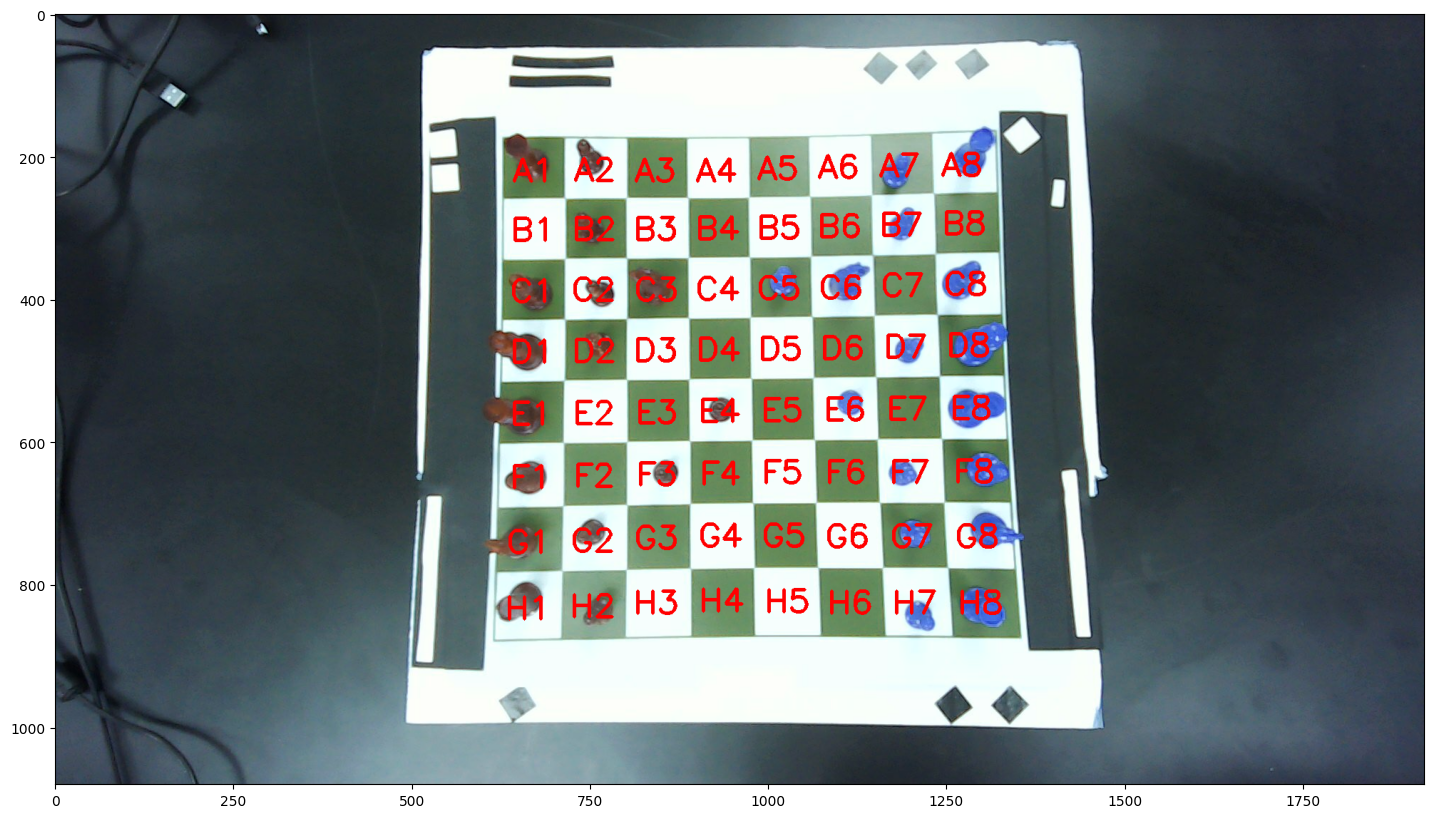

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


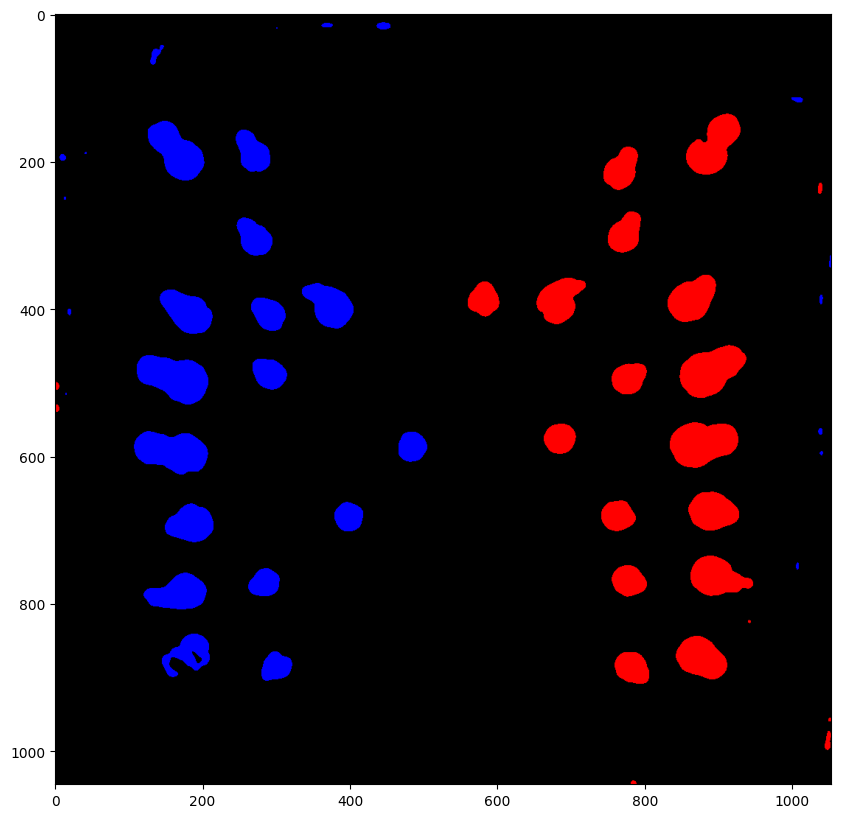

{'red': ['a7', 'a8', 'b7', 'c5', 'c6', 'c8', 'd7', 'd8', 'e6', 'e8', 'f7', 'f8', 'g7', 'g8', 'h7', 'h8'], 'blue': ['a1', 'a2', 'b2', 'c1', 'c2', 'c3', 'd1', 'd2', 'e1', 'e4', 'f1', 'f3', 'g1', 'g2', 'h1', 'h2']}


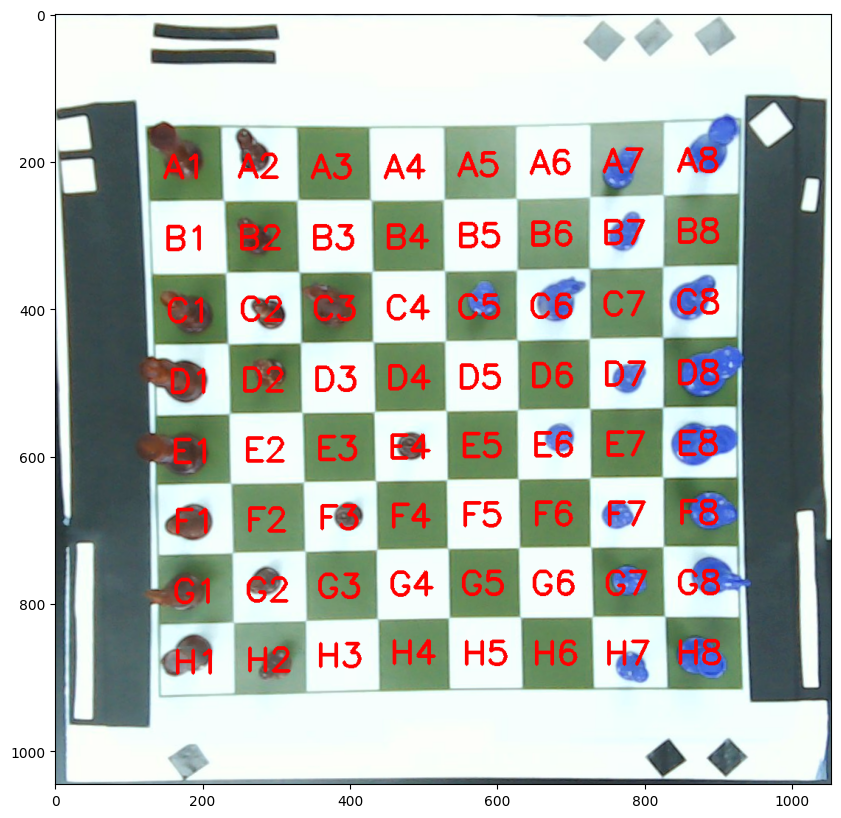

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


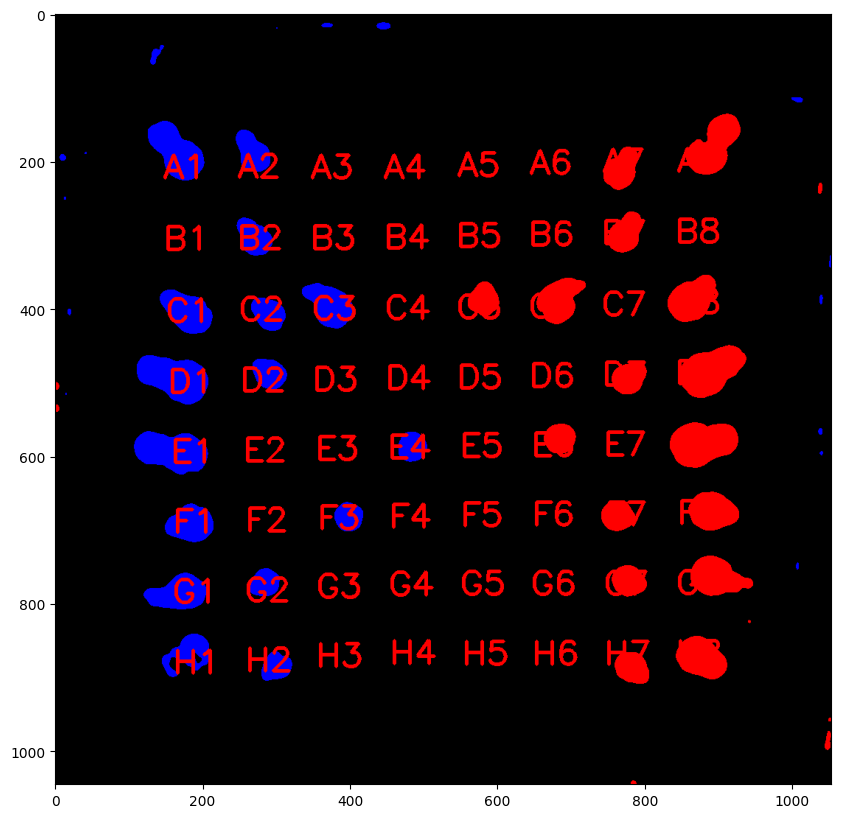

In [17]:
reference = cv.imread(f'reference.jpg', cv.IMREAD_COLOR)
ret, reference, diff, state = get_board(query, reference, centers, corners, plot=True)
print(state)
show_board_labels(reference.copy(), centers, (8,8))
show_board_labels(diff.copy(), centers, (8,8))

In [16]:
OPTION = True
color_option = 'blue' if OPTION else 'red'

color_state = state[color_option]

new_state = [i for i in color_state]
new_state[-1] = 'h4'

start, end = get_move(color_state, new_state)
print("Stockfish Command:", start[0] + end[0])

Stockfish Command: h2h4


In [7]:
start, end = ['e1', 'h1'], ['g1', 'f1']
print(get_move(start, end))
start, end = ['e1', 'a1'], ['b1', 'c1']
print(get_move(start, end))
start, end = ['e1', 'a1'], ['c1', 'd1']
print(get_move(start, end))

start, end = ['e8', 'h8'], ['g8', 'f8']
print(get_move(start, end))
start, end = ['e8', 'a8'], ['b8', 'c8']
print(get_move(start, end))
start, end = ['e8', 'a8'], ['c8', 'd8']
print(get_move(start, end))

Castling
(['e1'], ['g1'])
Castling
(['e1'], ['b1'])
Castling
(['e1'], ['c1'])
Castling
(['e8'], ['g8'])
Castling
(['e8'], ['b8'])
Castling
(['e8'], ['c8'])
